In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Loading our final dataset for final checkup for nulls and other kinds of stuff!!
df_whole = pd.read_csv('/Users/kishohars/Projects/football_valuation_project/data_clean/df_whole.csv')

df_whole.head()

,player_id,name,last_season,current_club_id_x,player_code,country_of_citizenship,sub_position,position,foot,height_in_cm,...,age,market_value_in_eur_y,current_club_id_y,minutes_played,goals,assists,yellow_cards,red_cards,goals_per90,assists_per90
0,1606,Morten Rasmussen,2012,2414,morten-rasmussen,Denmark,Centre-Back,Defender,right,188.0,...,40.0,50000,2414,2989.0,1.0,0.0,11.0,0.0,0.030110,0.000000
1,1784,René Adler,2018,39,rene-adler,Germany,Goalkeeper,Goalkeeper,NaN,NaN,...,40.0,500000,39,12858.0,0.0,3.0,12.0,1.0,0.000000,0.020999
2,2857,Eldin Jakupovic,2022,29,eldin-jakupovic,Switzerland,Goalkeeper,Goalkeeper,right,191.0,...,40.0,100000,29,2837.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,3256,Roberto Hilbert,2016,15,roberto-hilbert,Germany,Right-Back,Defender,right,182.0,...,40.0,100000,15,8938.0,4.0,10.0,25.0,0.0,0.040277,0.100694
4,3269,Calvin Zola,2013,370,calvin-zola,DR Congo,Centre-Forward,Attack,right,191.0,...,40.0,300000,370,834.0,3.0,4.0,1.0,0.0,0.323741,0.431655


In [3]:
df_whole.isna().sum()

player_id                                   0
name                                        0
last_season                                 0
current_club_id_x                           0
player_code                                 0
country_of_citizenship                    356
sub_position                               93
position                                    0
foot                                     1738
height_in_cm                             1503
contract_expiration_date                 8838
agent_name                              12981
current_club_domestic_competition_id        0
current_club_name                           0
highest_market_value_in_eur                 0
age                                         0
market_value_in_eur_y                       0
current_club_id_y                           0
minutes_played                           5632
goals                                    5632
assists                                  5632
yellow_cards                      

In [4]:
# Fill categorical missing values
df_whole['country_of_citizenship'].fillna('Unknown', inplace=True)
df_whole['sub_position'].fillna('Unknown', inplace=True)
df_whole['foot'].fillna('Unknown', inplace=True)

# Fill numeric missing values
df_whole['height_in_cm'].fillna(df_whole['height_in_cm'].median(), inplace=True)

# Fill performance stats with 0 (no appearances)
perf_cols = ['minutes_played', 'goals', 'assists', 
             'yellow_cards', 'red_cards', 'goals_per90', 'assists_per90']
df_whole[perf_cols] = df_whole[perf_cols].fillna(0)

# Drop irrelevant columns
df_whole.drop(['contract_expiration_date', 'agent_name'], axis=1, inplace=True)

# Final check
df_whole.isna().sum().sort_values(ascending=False).head(10)

/var/folders/8x/6_l7vxm97zb26cb1l1_vd9180000gn/T/ipykernel_12608/773321618.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_whole['country_of_citizenship'].fillna('Unknown', inplace=True)
/var/folders/8x/6_l7vxm97zb26cb1l1_vd9180000gn/T/ipykernel_12608/773321618.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

player_id                      0
highest_market_value_in_eur    0
goals_per90                    0
red_cards                      0
yellow_cards                   0
assists                        0
goals                          0
minutes_played                 0
current_club_id_y              0
market_value_in_eur_y          0
dtype: int64

In [5]:
df_whole.head()

,player_id,name,last_season,current_club_id_x,player_code,country_of_citizenship,sub_position,position,foot,height_in_cm,...,age,market_value_in_eur_y,current_club_id_y,minutes_played,goals,assists,yellow_cards,red_cards,goals_per90,assists_per90
0,1606,Morten Rasmussen,2012,2414,morten-rasmussen,Denmark,Centre-Back,Defender,right,188.0,...,40.0,50000,2414,2989.0,1.0,0.0,11.0,0.0,0.030110,0.000000
1,1784,René Adler,2018,39,rene-adler,Germany,Goalkeeper,Goalkeeper,Unknown,183.0,...,40.0,500000,39,12858.0,0.0,3.0,12.0,1.0,0.000000,0.020999
2,2857,Eldin Jakupovic,2022,29,eldin-jakupovic,Switzerland,Goalkeeper,Goalkeeper,right,191.0,...,40.0,100000,29,2837.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,3256,Roberto Hilbert,2016,15,roberto-hilbert,Germany,Right-Back,Defender,right,182.0,...,40.0,100000,15,8938.0,4.0,10.0,25.0,0.0,0.040277,0.100694
4,3269,Calvin Zola,2013,370,calvin-zola,DR Congo,Centre-Forward,Attack,right,191.0,...,40.0,300000,370,834.0,3.0,4.0,1.0,0.0,0.323741,0.431655


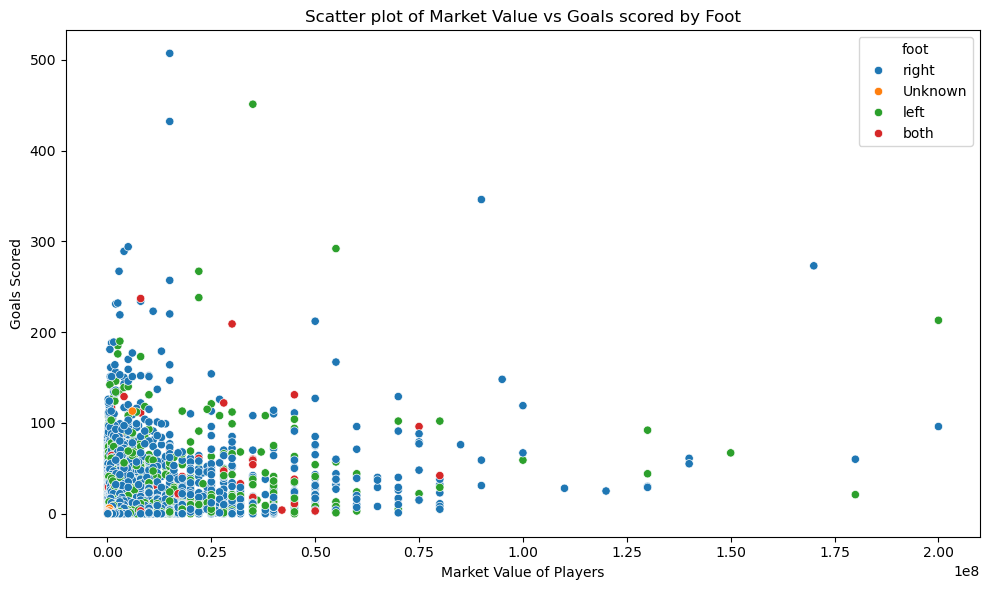

In [6]:
# Plotting correlation heatmap for foot and goals scored!!

plt.figure(figsize = (10,6))
sns.scatterplot(data = df_whole[df_whole['market_value_in_eur_y'] != 'Unknown'], x = 'market_value_in_eur_y', y = 'goals', hue = 'foot')
plt.title('Scatter plot of Market Value vs Goals scored by Foot')
plt.xlabel('Market Value of Players')
plt.ylabel('Goals Scored')
plt.tight_layout()
plt.show()

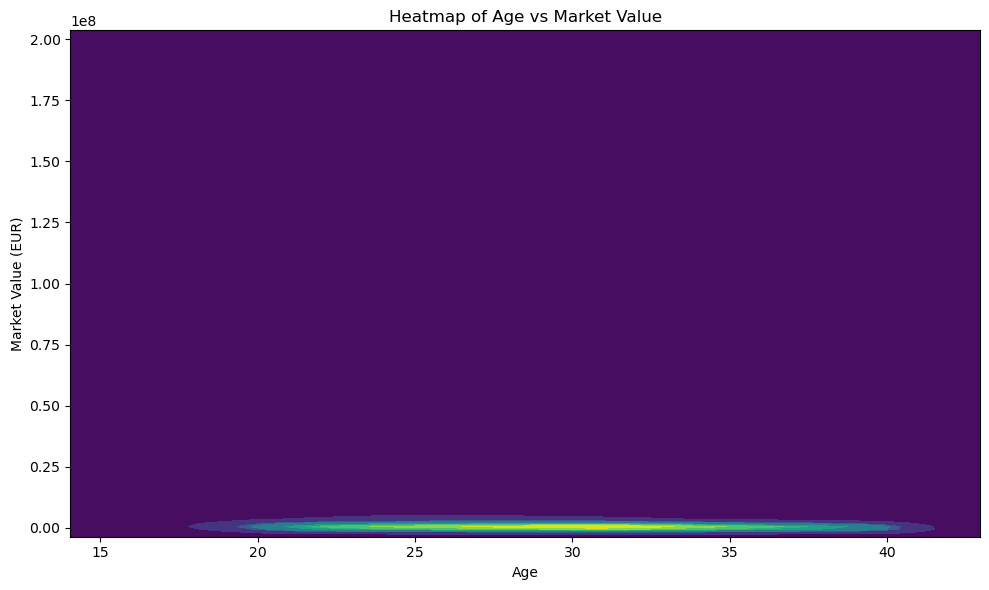

In [7]:
# age vs market value

plt.figure(figsize = (10, 6))

df_filtered = df_whole[df_whole['market_value_in_eur_y'] != 'Unknown'].copy()
# Ensure market value is numeric
df_filtered['market_value_in_eur_y'] = pd.to_numeric(df_filtered['market_value_in_eur_y'], errors='coerce')

sns.kdeplot(x='age', y='market_value_in_eur_y', data=df_filtered, cmap='viridis', fill=True, thresh=0)
plt.title('Heatmap of Age vs Market Value')
plt.xlabel('Age')
plt.ylabel('Market Value (EUR)')
plt.tight_layout()
plt.show()

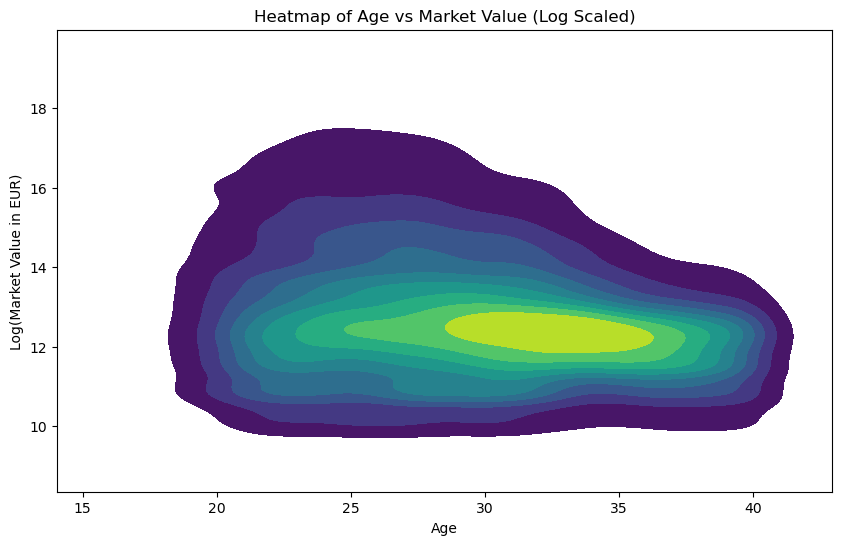

In [8]:
plt.figure(figsize=(10,6))
sns.kdeplot(
    data=df_whole,
    x='age',
    y=np.log1p(df_whole['market_value_in_eur_y']),  # log1p avoids log(0) error
    fill=True,
    cmap='viridis'
)
plt.title('Heatmap of Age vs Market Value (Log Scaled)')
plt.xlabel('Age')
plt.ylabel('Log(Market Value in EUR)')
plt.show()

In [9]:
df_whole.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28462 entries, 0 to 28461
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             28462 non-null  int64  
 1   name                                  28462 non-null  object 
 2   last_season                           28462 non-null  int64  
 3   current_club_id_x                     28462 non-null  int64  
 4   player_code                           28462 non-null  object 
 5   country_of_citizenship                28462 non-null  object 
 6   sub_position                          28462 non-null  object 
 7   position                              28462 non-null  object 
 8   foot                                  28462 non-null  object 
 9   height_in_cm                          28462 non-null  float64
 10  current_club_domestic_competition_id  28462 non-null  object 
 11  current_club_na

In [10]:
df_whole.to_csv('/Users/kishohars/Projects/football_valuation_project/data_clean/df_whole.csv', index = False)